In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Linear regression in one dimension
class linear_regression_1D:
    
    # Class constructor
    def __init__(self):
        # Define the vector w (the slop of the line)
        # w is the two diemensional vector becuase we must absorb b into w
        self.w = np.zeros(2)
        self.z = np.zeros(2)
        # Define the learning rate
        self.alpha = 1

    # Class function to set the learning rate
    def set_learning_rate(self, alpha):
        self.alpha = alpha

    # Class function to fit the data (find the appropiate value of w)
    def fit(self, x, y, iteration=1500):
        self.y = y
        # Apply transformation to x. Recall that we must absorb b into w 
        self.x = np.append(x.transpose(), np.ones((x.shape[1], 1)), axis=1)
        # Set learning rete from c/time
        # self.alpha = self.alpha/iteration
        # Iteratively make an updage for w by gradient descent
        for i in range(iteration):
            self.make_one_update()

    # Class function to make an update for w
    #implementing the ADAGRAD algorithm
    def make_one_update(self):
        w_current = self.w
        g = self.compute_gradient(w_current)
        self.z += g**2
        # Set step size 
        step = (-1)*self.alpha*g/(np.sqrt(self.z)+0.0000001)
        w_update = w_current + step
        
        # Report the progress of convergence
        current_loss = self.sq_loss(w_current)
        update_loss = self.sq_loss(w_update)
        if current_loss > update_loss:
            print("Loss decreases to ", update_loss,)
        else:
            print("Loss increases to ", update_loss,)
        self.w = w_update
    
    # Class function to compute the gradient with respect to the current w
    def compute_gradient(self, w_current):
        grad_v = np.zeros(2)
        # Uncomment the following to implement how to compute the gradient vector
        # wx: the predicted value of y
        # From 1/m * sum((wx - y)*x)
        grad_v[0] = np.sum((np.dot(self.x, w_current) - self.y)*self.x[:,0])/len(self.y)
        grad_v[1] = np.sum((np.dot(self.x, w_current) - self.y)*self.x[:,1])/len(self.y)
        print("The norm of grad vector is ", math.sqrt(np.inner(grad_v, grad_v)))
        return grad_v

    # Class function to compute the square loss function
    def sq_loss(self, w):
        # Uncomment the following to implement how to compute the loss function
        # From 1/2m * sum((wx - y)**2)
        loss = sum((np.dot(self.x, w) - self.y)**2)/len(self.y)*2
        return loss
        
        

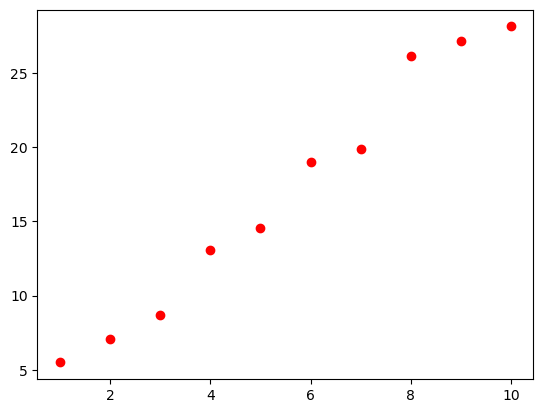

In [2]:
# Create our data set where x is one-dimensional
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
y = np.array([5.5, 7.1, 8.7, 13.1, 14.56, 19.01, 19.85, 26.12, 27.11, 28.112])

# The 2D plot of our data
plt.plot(x.transpose(), y, 'ro')
plt.show()


In [5]:

h = linear_regression_1D()

# You may edit the learning rate if the current setting does not yield convergence
h.set_learning_rate(1)

# Uncomment the following to fit the vector w to our data. 
# You may also edit the number of iterations if the current setting does not yield convergence
h.fit(x, y, 100)

The norm of grad vector is  117.03696290676719
Loss decreases to  270.6726492943255
The norm of grad vector is  72.55953483937155
Loss decreases to  125.47395916438991
The norm of grad vector is  49.135837924366044
Loss decreases to  62.16621320657058
The norm of grad vector is  34.20765678670522
Loss decreases to  32.21796131218365
The norm of grad vector is  24.099400458249963
Loss decreases to  17.556537659854353
The norm of grad vector is  17.079421481890964
Loss decreases to  10.262898991693122
The norm of grad vector is  12.146818264894788
Loss decreases to  6.605234446894191
The norm of grad vector is  8.66127206974185
Loss decreases to  4.762686750063661
The norm of grad vector is  6.191438830248779
Loss decreases to  3.831468780685823
The norm of grad vector is  4.439017394396725
Loss decreases to  3.3591385333630606
The norm of grad vector is  3.1949575327586746
Loss decreases to  3.118228071992952
The norm of grad vector is  2.3117808151733605
Loss decreases to  2.9941293000

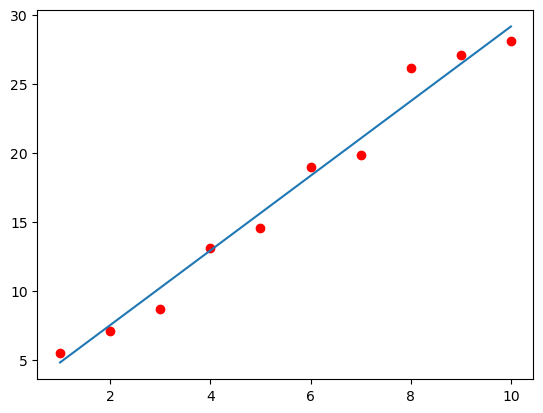

In [6]:
# The following codes is to give a 2D plot our data and the linear function that we learnt from our setting
plt.plot(x.transpose(), y, 'ro')
plt.plot(x.transpose(), x.transpose()*h.w[0]+h.w[1], linestyle='solid')
plt.show()

In [ ]:
# using ADAGRAD algorithm
# we can use bigger learning rate for the same iteration times
# if we add more iteration times, the loss will decrease
# and loss is smaller than the previous one